In [1]:
!pip install tweepy

In [2]:
!pip install openpyxl

In [24]:
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler
import matplotlib.pyplot as plt

In [4]:
consumer_key="KJTCVD3w7VvKQ8ZNaswE7ftZi"
consumer_secret="aYkFJYuFAsDsQ9b2UhjoZ49ss9Q65se7AqXJk3cn0kwmYQ9GSo"
access_token="3195378463-Tvx9CqrAcGBNeVqRubOMD8ylWsbtdQE58sOLWVQ"
access_token_secret="f46zy8mP0luJ5kDz0iu5Uk1FotiIfxIm7MHFIhdoxNpPy"


In [5]:
auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [6]:
query="PMCaresFund"

In [7]:
Tweets = api.search( query , count=10 , lang='en' , exclude='retweets' , tweet_mode='extended' )
# tweet_mode='extended'
# tweet_mode='compat'

for tweet in Tweets:
    print(tweet,"\n")
    print(".....................................\n")

Status(_api=<tweepy.api.API object at 0x000001F4EFD5EFA0>, _json={'created_at': 'Sun May 30 07:04:37 +0000 2021', 'id': 1398898121573236736, 'id_str': '1398898121573236736', 'full_text': 'PM Modi launches PM CARES for Children Scheme: Free education &amp; stipend, see key benefits\n#PMCaresFund\n@PMOIndia\n@narendramodi\nhttps://t.co/94sNK6uNnJ', 'truncated': False, 'display_text_range': [0, 154], 'entities': {'hashtags': [{'text': 'PMCaresFund', 'indices': [94, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'PMOIndia', 'name': 'PMO India', 'id': 471741741, 'id_str': '471741741', 'indices': [107, 116]}, {'screen_name': 'narendramodi', 'name': 'Narendra Modi', 'id': 18839785, 'id_str': '18839785', 'indices': [117, 130]}], 'urls': [{'url': 'https://t.co/94sNK6uNnJ', 'expanded_url': 'https://www.republicworld.com/india-news/education/pm-modi-launches-pm-cares-for-children-scheme-free-education-and-stipend-see-key-benefits.html', 'display_url': 'republicworld.com/india-news/edu…'

In [8]:
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'user_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
print(df)


Empty DataFrame
Columns: [Tweets, User, User_statuses_count, user_followers, User_location, User_verified, fav_count, rt_count, tweet_date]
Index: []


In [9]:
def stream(data):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [10]:
stream(data=["PMCaresFund"])

In [11]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,RT @lindanewmai: PM Modi Ji announced that all...,Team Ravula Bharath Reddy,32710,336,,False,0,46,2021-05-30 07:04:48
1,PM Modi launches PM CARES for Children Scheme:...,Nandini,1290,550,"New Delhi, India",False,0,0,2021-05-30 07:04:37
2,RT @dpradhanbjp: Govt. under the leadership of...,Asish Nayak,7098,39,,False,0,58,2021-05-30 07:04:30
3,RT @MrsGandhi: Children below the age of 18yrs...,Sanatana,52775,429,India,False,0,634,2021-05-30 07:04:18
4,RT @MrsYNV: Hahaha🤣😂..\n\n Unfortunately.. \n\...,Sourav Kundu,42515,6638,"Kolkata, India",False,0,29,2021-05-30 07:04:11


In [12]:
df.to_excel("pmcares.xlsx")

In [13]:
!pip install textblob

In [14]:
from textblob import TextBlob

In [15]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [16]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [17]:
df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))

In [18]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet
0,RT @lindanewmai: PM Modi Ji announced that all...,Team Ravula Bharath Reddy,32710,336,,False,0,46,2021-05-30 07:04:48,RT PM Modi Ji announced that all children who ...
1,PM Modi launches PM CARES for Children Scheme:...,Nandini,1290,550,"New Delhi, India",False,0,0,2021-05-30 07:04:37,PM Modi launches PM CARES for Children Scheme ...
2,RT @dpradhanbjp: Govt. under the leadership of...,Asish Nayak,7098,39,,False,0,58,2021-05-30 07:04:30,RT Govt under the leadership of PM Modi will d...
3,RT @MrsGandhi: Children below the age of 18yrs...,Sanatana,52775,429,India,False,0,634,2021-05-30 07:04:18,RT Children below the age of 18yrs who have lo...
4,RT @MrsYNV: Hahaha🤣😂..\n\n Unfortunately.. \n\...,Sourav Kundu,42515,6638,"Kolkata, India",False,0,29,2021-05-30 07:04:11,RT Hahaha Unfortunately PMCaresFund is a Gover...


In [19]:
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,RT @lindanewmai: PM Modi Ji announced that all...,Team Ravula Bharath Reddy,32710,336,,False,0,46,2021-05-30 07:04:48,RT PM Modi Ji announced that all children who ...,Negative
1,PM Modi launches PM CARES for Children Scheme:...,Nandini,1290,550,"New Delhi, India",False,0,0,2021-05-30 07:04:37,PM Modi launches PM CARES for Children Scheme ...,Positive
2,RT @dpradhanbjp: Govt. under the leadership of...,Asish Nayak,7098,39,,False,0,58,2021-05-30 07:04:30,RT Govt under the leadership of PM Modi will d...,Neutral
3,RT @MrsGandhi: Children below the age of 18yrs...,Sanatana,52775,429,India,False,0,634,2021-05-30 07:04:18,RT Children below the age of 18yrs who have lo...,Positive
4,RT @MrsYNV: Hahaha🤣😂..\n\n Unfortunately.. \n\...,Sourav Kundu,42515,6638,"Kolkata, India",False,0,29,2021-05-30 07:04:11,RT Hahaha Unfortunately PMCaresFund is a Gover...,Negative


In [20]:
df['Sentiment'].value_counts()

Neutral     397
Positive    397
Negative    206
Name: Sentiment, dtype: int64

In [21]:
df1=df[df['Sentiment']=='Negative']

In [22]:
n = 57
print("Original tweet:\n",df1['Tweets'][n])
print()
print("Clean tweet:\n",df1['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df1['Sentiment'][n])

Original tweet:
 RT @lindanewmai: PM Modi Ji announced that all children who have lost both parents or guardian due to #COVID19 will be supported under ‘PM-…

Clean tweet:
 RT PM Modi Ji announced that all children who have lost both parents or guardian due to COVID19 will be supported under PM

Sentiment of the tweet:
 Negative


In [23]:
df1.reset_index(inplace=True)

(array([206.,   0.,   0.,   0.,   0., 397.,   0.,   0.,   0., 397.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

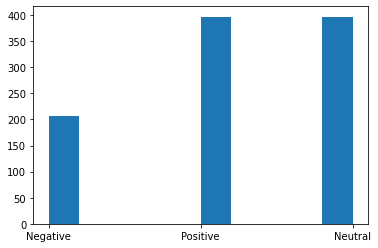

In [26]:
plt.hist(df['Sentiment'])